# Supervised Learning Primer - Linear Models

## 1) Introduction

So you've learned how process images so that a computer can detect objects or extract features to help identify those objects. But how do you teach a machine to identify objects based on features? Let's explore that question by looking a a plot of dots. This one is about penguins.

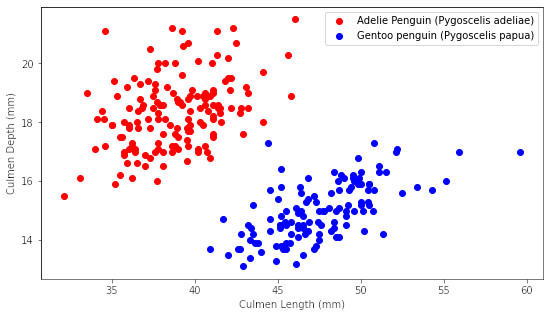

Notice how the colors separate into two different groups of penguins, the Adelie and Gentoo. The features are the culmen (basically beak) length and depth. As a human, you can see the two distinct groups. But a machine will just see dots, regardless of color. And these are for penguins you know. What if you were to collect more features from new penguins, would a machine be able to figure out which group that data belonged to?

This is where Supervised Learning comes from. You, the human, will **supervise** a machine's **learning** to identify penguins based on collected features (length and depth, in this case). Since this primer is about Linear Models, look at the plot above again. You can almost see an invisible line traveling like a river between two groups of rocks (points), and that's what we're going to learn with this notebook.

Of course, this is a simplified case to illustrate the concepts on supervised learning with linear models, but reality is often more challenging. Let's jump into the learning outcomes, then downloading the dataset.

*Disclaimer: This notebook is a remix of the following tutorials:*

https://adataanalyst.com/scikit-learn/linear-classification-method/

https://inria.github.io/scikit-learn-mooc/python_scripts/logistic_regression.html

https://appdividend.com/2019/02/01/python-scikit-learn-tutorial-for-beginners-with-example/

> Side-Note: Remember that side-notes are skippable for this notebook.

## 2) Learning Outcomes

* Learn some data manipulation and wrangling with pandas library
* Learn a little about making plots with matplotlib
* Learn how to setup a Supervised Learning Classification pipeline, leading to testing multiple models
* Review a little math to understand how all this learning works.
* Learn a little about dictionary manipulation

## 3) Dataset and Library Setup



#### a) Download Penguin Dataset

In [ ]:
# Important, run this code first to download the penguin dataset.
!pip install palmerpenguins

# The !pip command is a Python command that let's you install other Python libraries.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


> Side-Note: These side-notes are optional to read, skip these to jump straight to the code. These side-notes may provide background and extra interesting bits of informations. For the curious, read more about the [penguin dataset here](https://inria.github.io/scikit-learn-mooc/python_scripts/trees_dataset.html?highlight=penguins) and access the [GitHub here](https://github.com/allisonhorst/palmerpenguins). If you visit it, then you'll notice the dataset was designed for the R programming language, but it still works for Python thanks to the functions they placed in it.

### b) Python Libraries

In [ ]:
# Import the penguins dataset
import palmerpenguins

# Load other libraries used in this notebook.
import matplotlib.pyplot as plt
import numpy as np
import pandas

# Sci-Kit Learn Library
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

## 4) Data Wrangling

We're going to use the pandas library to view the data. The pengiuns library already has a function called load_penguins_raw() to load the data as a pandas Dataframe. Despite how technical it sounds, you can think of it as an Excel or Google Sheet, but with more flexibility (like Python manipulation).

> Side-note: No tutorial went over this, I had to explore the functions provided by the penguin dataset, then displayed each output until I found the one I was looking for. This is an example of data wrangling. Even loading up the data can be a challenge, be prepared! Sometimes you get a simple CSV file, sometimes you don't.

In [ ]:
# Load Data as pandas Dataframe
data = palmerpenguins.load_penguins_raw()

# Display the first (head) 5 rows of the Dataframe
data.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,2007-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


### a) Quick exercise

1) Could you display just the first row of data? How the first 10?

2) What happens if replace the 5 with nothing, just a data.head()? What's the default value?


<details>
<summary><b>Answers</b> (Click here to expand):</summary>

> 1) Replace the 5 with a 1 or a 10. Try out other numbers and see what happens.

> 2) Default is 5.
</details>

More pandas head, tail, and more examples here:

https://pynative.com/pandas-dataframe-head-tail-at-iat/

### b) Unique Values
Let's do some data wrangling. First, we need to find out how many species of penguins there are in this dataset. And what are they? We'll need these group distinctions when training our supervised learning model. You can think of it like in real life, you learn better when you have lots of data and experiences to think back on.

> Side-Note: Humans work better when we have more time to learn, but the advantage of computers is they don't need time to absorb information like we do. The flip of that, computers have major difficulty in being creative like us. Like they literally can't.

In [ ]:
# If that is too weird to get used to, you can use the normal dictionary access to get the unique value.

data["Species"].unique()

array(['Adelie Penguin (Pygoscelis adeliae)',
       'Gentoo penguin (Pygoscelis papua)',
       'Chinstrap penguin (Pygoscelis antarctica)'], dtype=object)

More info about Python Dictionaries:

https://www.w3schools.com/python/python_dictionaries.asp

https://www.tutorialspoint.com/python/python_dictionary.htm

https://www.geeksforgeeks.org/python-dictionary/

#### i) Develop your programmer's intuition
What happens in the following scenarios:

- Just have "data" in a code block and run it.
- Just have "data.Species" in a code block and run it.
- Just have "data["Species"]" in a code block and run it.
- Instead of "Species", what about the other columns. Can you access the Region, Island, and Sex columns. What unique values come out of them?

This is both intuition and data wrangling development. If you took one of the other SCIP classes before, you might have run into the concept of data wrangling. Exploring your data is also part of being a scientist, to help you see patterns.



### c) Penguin Selection

First point, we're only going to focus on two species of penguins: Adelie and Gentoo. To make things easier, we're going to ignore the 3rd species, Chinstrap.

In [ ]:
# The next line of code has a lot going on.
# First, we rearrange the dataframe so that the Species column goes first. set_index() does that.
# Second, we only keep the rows that contain the species we're interested in: Adelie and Gentoo. loc()
#         Notice how the full string we found earlier using unique() is used. A partial match was not allowed.
# Third, we reset the index so the row columns start at zero. reset_index() handles that.
#        The numbering might have been changed because we're excluding a group of penguins.

penguins = data.set_index("Species").loc[["Adelie Penguin (Pygoscelis adeliae)", "Gentoo penguin (Pygoscelis papua)"]].reset_index()

# Display the penguins dataframe, is the species column first?
penguins.head(5)

,Species,studyName,Sample Number,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,Adelie Penguin (Pygoscelis adeliae),PAL0708,1,Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,Adelie Penguin (Pygoscelis adeliae),PAL0708,2,Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,Adelie Penguin (Pygoscelis adeliae),PAL0708,3,Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,Adelie Penguin (Pygoscelis adeliae),PAL0708,4,Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,2007-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,Adelie Penguin (Pygoscelis adeliae),PAL0708,5,Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


#### i) Dataframe manipulation links

.set_index(): https://www.geeksforgeeks.org/python-pandas-dataframe-set_index/

.loc[]: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html

.reset_index(): https://www.geeksforgeeks.org/reset-index-in-pandas-dataframe/


Optionally, you can use unique() again on the Species column to make sure the Chinstrap species is not included.

### d) NaN values

In your exploration, you might have seen a NaN value show up, this stands for "Not a Number", usually when an entry doesn't have anything or is not a number when a number was expected. This is bad for supervised learning since the library we're using doesn't accept NaN values for learning (disadvantage of a machine, a human could easily disregard that).

Since our supervised learning will be focused on two columns: the Culmen Length and Culmen Depth, we're going to explore that column for NaN values.

In [ ]:
# First, we just want to see if a NaN value exists there. No deleting yet.

# Second, it would be helpful to get the exact string names for the columns we're interested in.
#         Use the following line to get the columns and display them (Only works in these notebooks!)
penguins.columns

Index(['Species', 'studyName', 'Sample Number', 'Region', 'Island', 'Stage',
       'Individual ID', 'Clutch Completion', 'Date Egg', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex',
       'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Comments'],
      dtype='object')

Excellent, so the exact strings are 'Culmen Length (mm)', 'Culmen Depth (mm)'. Let's put them into a list so we can easily access it.

> Side-note: If you decide to switch to an IDE like Python's IDLE, PyCharm, Anaconda, Spyder, or more. Lines like penguins.columns would not work, these are exclusive to Jupyter Notebooks and Google Colab. For more script-based stuff, you would have to use a print statement. Example, print(penguins.columns. You can try that in a code block here to see how that output would look. Print statements do work in these notebooks!

Now that we have the column names we want to explore, let's search for NaN values.

In [ ]:
# Put in a list so we can access it easily (will be used in a plot later)
culmen_columns = ["Culmen Length (mm)", "Culmen Depth (mm)"]

# Put those strings into a more readable variable
# Why am I doing this? I'm trying to develop good habits that does two things:
# 1) Makes the more code readable and understandable when I look back on it.
# 2) In the future, I may want to change the column names or the dataset may actually change them in an update.
#    This would make it easier to trace the bug if that update ever happens.
#    A bug would most likely happen around here if an update happens, making it easier to fix.
# Note: You don't have to do this. I'll provide an alternative way in the next code block.
length = culmen_columns[0]
depth = culmen_columns[1]

# There's a lot going on in the next line.
# First, use the penguins dataframe.
# Second, look in the Culmen Length column, shown with "length".
# Third, check for any Nan values with isna(). The "na" here stands for Not A number, it's missing the last n.
# So what this does is only show rows that have a NaN in the Culmen Length column.
# By luck, both the length and depth have a NaN on the same rows.
penguins[penguins[length].isna()]

,Species,studyName,Sample Number,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
3,Adelie Penguin (Pygoscelis adeliae),PAL0708,4,Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,2007-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
271,Gentoo penguin (Pygoscelis papua),PAL0910,120,Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,2009-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled. Nest never observed with fu...


In [ ]:
# Alternative way to get to the point faster
# Notice there is no list created or variables created, just one line.

penguins[penguins["Culmen Length (mm)"].isna()]

# Personal choice on which way you go. There is no wrong way.
# Either method has it's advantages and disadvantages.
# My method is longer, but does allow for plot automation (which you'll see later)

,Species,studyName,Sample Number,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
3,Adelie Penguin (Pygoscelis adeliae),PAL0708,4,Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,2007-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
271,Gentoo penguin (Pygoscelis papua),PAL0910,120,Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,2009-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled. Nest never observed with fu...


#### i) NaN Exercise

Now that you see there are NaN values in the length column. Try it with the depth column.

<details>
<summary>Possible Answers (Click Here to Expand):</summary>

```
penguins[penguins["Culmen Depth (mm)"].isna()]
```
or
```
penguins[penguins[depth].isna()]
```
</details>

#### ii) Remove NaN values

We proved the existence of NaN values, now to remove them because our supervised learning doesn't understand NaN values and will crash.


In [ ]:
# Copying and Pasting list and variables here so you can see it easier.
culmen_columns = ["Culmen Length (mm)", "Culmen Depth (mm)"]

length = culmen_columns[0]
depth = culmen_columns[1]

# Remove NaN values from length column, then overwrite old penguins variable with new dataframe
penguins = penguins[penguins[length].notna()]

# Remove NaN values from depth column, then overwrite old penguins variable with new dataframe
penguins = penguins[penguins[depth].notna()]

# Notice how I used the same variable.
# You can think of it as "Saving" over the original variable, like when you save a document.
# This way is personal preference, but may lead to confusion in the future.
# An alternative way would be to rename the first one to something like penguins_length_notna,
# then the second one would be penguins_length_depth_notna.

### e) Scatter Plot View
For our human eyes, plotting the data might help us see patterns and to have an idea of the expected output of our learning. You can skip this section if you want to jump straight to supervised learning. This is how I created the plot at the beginning of this notebook.

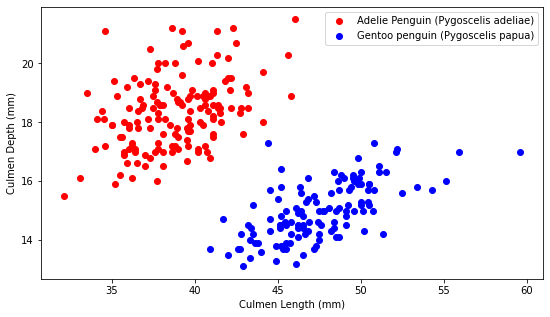

In [ ]:
# Create two lists (copied and pasted for easier viewing)
# one for extracting the data for that breed and
# two for the color of dots on the scatterplot.
breed_list = ['Adelie Penguin (Pygoscelis adeliae)', 'Gentoo penguin (Pygoscelis papua)']
color_list = ['red', 'blue']

# Set list of x- and y-axis labels of scatterplot
culmen_columns = ["Culmen Length (mm)", "Culmen Depth (mm)"]

# For easier readability, put the column headers into variables for the labels.
length = culmen_columns[0]
depth = culmen_columns[1]

# Create matplotlib figure, make it big enough to fit the legend.
plt.figure(figsize=(9, 5))

# Use the zip function that allows you to go through two lists at the same time
# Get the breed from breed_list and colr from the color_list
# Note: I used colr because "color" is actually used as the input for scatterplot
#       and I wanted to avoid confusion. When you're more comfortable with
#       programming and variables, you won't have to do this.
for breed, colr in zip(breed_list, color_list):
  # Remember, matrix access is row, then column.
  # Look below, you can think of it as penguins[ROW][COLUMN]

  # Get only the rows for that breed (e.g. Adelie), then get that length column
  culmen_length = penguins[penguins.Species == breed][length]

  # Get only the rows for that breed (e.g. Adelie), then get that depth column
  culmen_depth = penguins[penguins.Species == breed][depth]

  # Create a scatterplot using the culmen_length (x-axis) and culmen_depth (y-axis)
  # Use the current colr (red is first, then blue is next). Look at the color_list
  plt.scatter(culmen_length, culmen_depth, color=colr)

# Create the color legend using the breed_list
plt.legend(breed_list)

# Set the x-axis label using the length string
plt.xlabel(length)

# Set the y-axis label using the depth string
plt.ylabel(depth)

# Show the plot
plt.show()

Develop your programmer's intuition:

1) Notice the figsize is 9 and 5. Try out different numbers to make it wider, taller, or turn it into a square. Data visualization for a human is important to learn for two reasons: 1) you, so you can see patterns. 2) for creating figures when publishing your scientific work (or presentations).

2) How did I know that red and blue would work for the colors? Go to this [link here](https://matplotlib.org/stable/gallery/color/named_colors.html), scroll down to **CSS Colors**. Notice that red and blue are in the list; this list contains strings that matplotlib knows as colors. You can actually do your own custom colors by using RGB values.

Try changing the colors of the dots to yellow and purple. Once you're comfortable, pick any color you want from that CSS Colors list.

3) Let's get comfortable with code crashing. Make a copy of the breed_list (copy and paste the code to a new line, then comment it; use Ctrl-/ (Windows) or CMD-/ (Mac, probably) or use the number sign (#) before the code. Now introduce a typo into "Adelie". Turn it into "Adeliee". An extra e. Watch what happens and see the error message that pops up. This bug will happen in your programming future. We humans will create typos, when writing up code, or from the dataset itself. There is actually a small typo next to Gentoo, the "p" in penguin is lowercase compared with Adelie's string. You always gotta be careful when data wrangling, typos will come up and may crash your code.

4) Play around with the for loop using zip(). If this is your first time seeing, it must seem weird. Make a copy of the code into a new code block (+ Code button near the top). Comment out everything in the for loop and everything below. Fast Version: Highlight the code you want to comment, then use the hotkey I mentioned above. Convenient, right?

Now, print out the contents of breed and colr. This will help you get comfortable with what zip is doing and to see what each iteration of that for loop is doing. You can use the time.sleep library to slow it down to see it, or your can use a print statement at the beginning of the loop saying something like "Starting New Loop". This will help you see when a new iteration of the loop is starting. This will help you with algorithm development in the future if you know what a for loop is doing.

You can also read more about [zip() here](https://www.geeksforgeeks.org/zip-in-python/).

5) Try adding in your own x- and y- axis labels. Whenever I'm trying out a new function that takes in a string, I usually use anything (like "fdsa") to make sure I know that the xlabel actually is displaying the label for the x-axis.

## 5) Supervised Learning Library - scikit-learn

So you prepared the data all to get to this step: using the machine learning library [scikit-learn](https://scikit-learn.org/stable/index.html) (aka sklearn). The beauty of this is one you know how to set up one machine learning model, you can actually run tests on lots of models to see which one works best for your data. But we're going to build up the foundations, first we're going to use a simple line to help the machine learn which data belongs to an Adelie or a Gentoo penguin.

In machine learning world, we have to split our data into two sets:

1) A training set that is used to teach the machine to identify which penguin is what (also called a class, as in classification).

2) A testing set used to test the accuracy of our machine learning algorithm.

Here, we will create the training and testing data using our penguins dataset.

### a) Create Training and Testing Datasets

In [ ]:
# The target column is the "class" used to identify the data.
# Here, we want Adelie and Gentoo, and those strings appear in the Species column
#  (Refer to one of the dataframe displays up above)
target_column = "Species"

# Copied and pasted here for easier viewing
# These columns will be used to teach the machine learning algorithm
culmen_columns = ["Culmen Length (mm)", "Culmen Depth (mm)"]

# Use the train_test_split() from the sklearn to split the penguins data into
# a training and testing set.
# This is like picking cards from a deck, it will be randomly chosen, but not replaced.
penguins_train, penguins_test = train_test_split(penguins, random_state=0)

# Separate target from data, create training/testing dataset
# These contain the length and depth measurements.
data_train = penguins_train[culmen_columns]
data_test = penguins_test[culmen_columns]

# Contains the penguin breed associated with the data_train and data_test above.
# For example: the first item in data_train has the length and depth measurement,
# then the first item in target_train has the breed of penguin associated with those measurements.
target_train = penguins_train[target_column]
target_test = penguins_test[target_column]

We just created the training and testing dataset that we will use to teach and test our machine learning algorithm.

We're going to use the LogisticRegression machine learning model. But, didn't I mention using lines before? Machine learning algorithms want values between 0 and 1, and these logistic curve allow for that. It turns a straight line until plateau. Something like in the next text block.



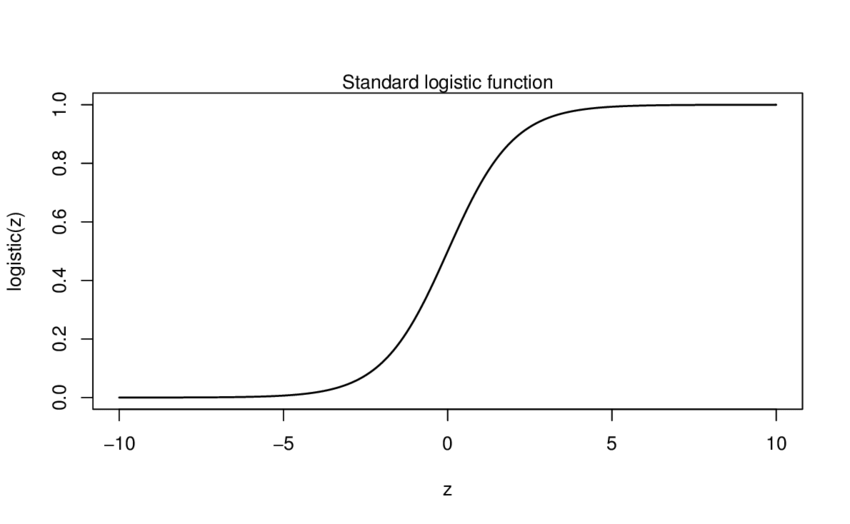

Source: https://www.researchgate.net/figure/Plot-of-the-standard-logistic-function-622_fig10_327336588

Notice how the middle looks like a straight line, but the top and bottom flatten out to be the ground and the top of a mountain. If that visual helps you see it. If the line kept going, it would go beyond 0 and 1, which is something that machine learning algorithms don't want. You might be wondering: why? Unfortunately, I don't know. I know there's a mathematical explanation for it, but I haven't researched it heavily yet.

Let's create and train our machine learning algorithm.

### b) Create Machine Learning Model

In [ ]:
# We'll use make_pipeline to set you up for later when you want to make a chain.
# For this notebook, we moved a part of the pipeline for simplicity.
# Turn off penalty, this is math thing where it helps with fine tuning what the
# decision line will become. Turned off for simplicity.
logistic_regression = make_pipeline(LogisticRegression(penalty="none"))

# This would actually work without the make_pipeline() and just using LogisticRegression.

# Train the logistic_regression model using the training and target data.
logistic_regression.fit(X=data_train, y=target_train)

# The model is now trained, let's test it out using the testing dataset.
accuracy = logistic_regression.score(data_test, target_test)

# Print the accuracy using 3 decimal places (.3) for floating point numbers (the second f)
print(f"Accuracy on test set: {accuracy:.3f}")

# The accuracy is a value between 0 and 1, multiply by 100 to get 98.6% accurate.

# Interpretation: The machine learning algorithm works almost all the time,
#   at least with the testing dataset.

Accuracy on test set: 0.986


All that work for a single percent decimal accuracy! Before we move one, quick programming exercise.

1) Change the print statement so that it displays 98.6% accuracy instead of 0.986

<details>
<summary>Answer (Click here to show the answer):</summary>

```
print(f"Accuracy on test set: {100 * accuracy:.1f}%")
```
</details>

### c) Visualize Decision Boundary

There's a better way to visualize the boundary line, so let's use the scatterplot we made before and get the boundary line from the logistic_regression model we made. First, the scatterplot with out the line, so you can see the difference.

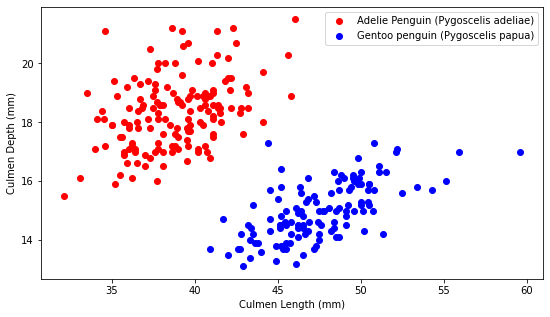

In [ ]:
breed_list = ['Adelie Penguin (Pygoscelis adeliae)', 'Gentoo penguin (Pygoscelis papua)']
culmen_columns = ["Culmen Length (mm)", "Culmen Depth (mm)"]
color_list = ['red', 'blue']

length = culmen_columns[0]
depth = culmen_columns[1]

plt.figure(figsize=(9, 5))
for breed, colr in zip(breed_list, color_list):
  culmen_length = penguins[penguins.Species == breed][length]
  culmen_depth = penguins[penguins.Species == breed][depth]
  plt.scatter(culmen_length, culmen_depth, color=colr)


plt.legend(breed_list)
plt.xlabel(length)
plt.ylabel(depth)
plt.show()

#### i) Boundary Line Math

Now let's add in the boundary line. In order to understand how I got the numbers, we need to review a little algebra. You can skip this section to jump into the code, but the numbers might confuse you.

The logistic_regression actually has the values of a line. You might recall from algebra the equation of a line, slope-intercept form:

<center>$\LARGE y = mx + b$</center>

Where m is the slope and b is the y-intercept. This formula actually comes from the standard equation of a line:

<center>$\LARGE ax + by + c = 0$</center>

The logistic_regression model actually has the coefficients "a" and "b" and the intercept "c" (from the Standard Equation, not the other one). It does not have the numbers in slope-intercept form. But to actually plot the line, we need it in slope-intercept form. So we have to solve for y in the standard equation.

*Note*: I recommend jumping back and forth between the code and this text box to see where I get the numbers from and how they are used.

We want the Standard Equation in slope-intercept form where y is on the left of the equals sign and everything else is on the right.

Start with the Standard Equation of a Line:
<center>$\LARGE ax + by + c = 0$</center>

So solve for $by$, subtract $ax$ and $c$ to both sides. You get this:

<center>$\LARGE by = -ax - c$</center>

then solve for $y$ by dividing both sides by $b$:

<center>$\LARGE y = -\frac{a}{b}x - \frac{c}{b}$</center>

For programming simplicity, we will make the equation into a single fraction. Notice that the denominator (bottom number of fraction) are the same. So we can combine those two fractions into one:

<center>$\LARGE y = \frac{-ax - c}{b}$</center>

Now you're ready for how I got the a, b, c values in the code below. You weren't expecting an algebra review, right? Machine learning is closely related to mathematics, but it isn't necessary to use them. Many tutorials online actually skip this explanation and jump straight into creating custom boundary lines (more on that later). It's personal preference if you want to learn the mathematics or not when you're first learning machine learning.

> Side-Note: If you're curious about how I got those LaTeX math format here, check out these links:
> 
> Google Colab - Working with LaTeX and Markdown:
>
> https://www.youtube.com/watch?v=wsXG_2W84ck
>
> https://latex-tutorial.com/changing-font-size/

Let's jump into plotting that line.

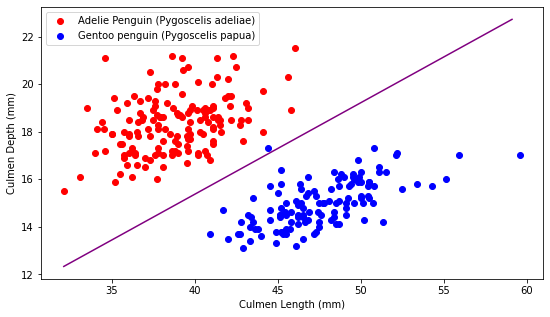

In [ ]:
# Same code as before
breed_list = ['Adelie Penguin (Pygoscelis adeliae)', 'Gentoo penguin (Pygoscelis papua)']
culmen_columns = ["Culmen Length (mm)", "Culmen Depth (mm)"]
color_list = ['red', 'blue']

length = culmen_columns[0]
depth = culmen_columns[1]

plt.figure(figsize=(9, 5))
for breed, colr in zip(breed_list, color_list):
  culmen_length = penguins[penguins.Species == breed][length]
  culmen_depth = penguins[penguins.Species == breed][depth]
  plt.scatter(culmen_length, culmen_depth, color=colr)


plt.legend(breed_list)
plt.xlabel(length)
plt.ylabel(depth)

# NEW STUFF: Create the decision boundary line

# Since we can't just plot the equation with matplotlib,
# we have to create x values to input into the equation

# First, find the minimum and maximum x values
# so the line doesn't shoot off into space or into the ocean.
# Use the penguins data to do that.
# Since this is the x-axis, we only want the length values.
x_min = penguins[length].min()
x_max = penguins[length].max()

# Create the numpy array (or vector) for those x values, and increment by 0.5.
# For example: 0, 0.5, 1, 1.5
xs = np.arange(x_min, x_max, 0.5)

# Get the coefficients and intercept
# Remember, the equation we found was y = (-ax - c)/b
# The last part of the pipeline is like a list, that contains the LogisticRegression model
# This model contains the coefficients and intercept of the decision boundary.
# The coef_ is actually like a matrix, so you access the first row (0),
# then access the first column (0). Remember, indexing starts at 0.
a = logistic_regression[-1].coef_[0, 0]

# First row, second column for the b coefficient.
b = logistic_regression[-1].coef_[0, 1]

# Finally, the intercept, or c (refer to the equations we found above)
c = logistic_regression[-1].intercept_[0]

# Create the y values using the equation we found above.
ys = (- a*xs - c) / b
# Note: For the math inclined, have you noticed there are two negatives?
#       Would this still work if you did a reverse distribution?

# Add the line as a plot to the same figure.
# Note: You can actually change the color of this line.
# Try changing the color!
plt.plot(xs, ys, color="purple")

# Show the scatterplot and line plot together.
plt.show()

To understand more of the coef_ variable, play around with it in the next code block. See if you can access the first number or the second number. Try the same with the intercept_ variable.

In [ ]:
logistic_regression[-1].coef_

array([[  4.10376546, -10.66213069]])

Looking at the plot, you can see the decision boundary actually missed one blue dot. Machine learning algorithms are not perfect.






### d) More about Decision Boundary Lines

This was a very barebones decision boundary. There is a much better version that scikit-learn provides in its latest version (version 1.1.1), but Google CoLab is only using 1.0.2, so I came up with this solution based on one of the tutorials I read; it is linked at the beginning.

The better verison is found here, if you're curious: https://inria.github.io/scikit-learn-mooc/python_scripts/logistic_regression.html. Requires an updated scikit-learn though, so no Google CoLab.

Alternatively, Mr. Sarkar made a function that do something similar. Here's the link: https://towardsdatascience.com/easily-visualize-scikit-learn-models-decision-boundaries-dd0fb3747508

*I have not tested it and it is two years old, so some of the code might be outdated by now. Keep that in mind if you decide to test it out. You might have to recreate his function one line at a time to make sure it works.

### e) More about Pipelines

You noticed earlier there was a make_pipeline function. In reality, there was another model in there, StandardScaler(). This would reduce the chances your machine learning algorithm is biased for your data. Read more about that here: https://www.journaldev.com/45025/standardscaler-function-in-python

I removed it here to make thing simpler in plotting the decision boundary since I wanted you to develop an understanding for how to create your own machine learning algorithms and to prepare you for the other notebooks.

### f) Testing more machine learning algorithms

I mentioned briefly about using multiple machine learning algorithms to see which one works best for your dataset. Once you get used to one, now you can use multiple. The main notebooks for this SCIP course will go over that, and you can try your hand at one by following along with the tutorial at this link: https://pythonguides.com/scikit-learn-classification/

## 6) Conclusion

So you learned how to process your data to make it machine learning ready and visualize the results. You practice using other datasets:

1. [scikit-learn course Datasets Descriptions](https://inria.github.io/scikit-learn-mooc/appendix/datasets_intro.html)

2. [scikit-learn's Iris dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)

3. Trying out all 3 penguin species or using the flipper length and explore what plots you get.

4. Or jump into another SCIP Notebook that will do plankton classification.

I also mentioned LinearModels (with an s). You can check them out here:

https://scikit-learn.org/stable/modules/linear_model.html

This was a lot to get into, so congratulate yourself on your hard work!

## Additional Links:

https://www.geeksforgeeks.org/get-unique-values-from-a-column-in-pandas-dataframe/


Really Advanced Machine Learning using CNN for shape detection (might be hard to learn!):

https://github.com/asidqa01/Recognition-of-Objects-CNN

https://github.com/keyurr2/shape-classifier-cnn

https://360digitmg.com/object-detection-using-cnn